## Tentativa 1

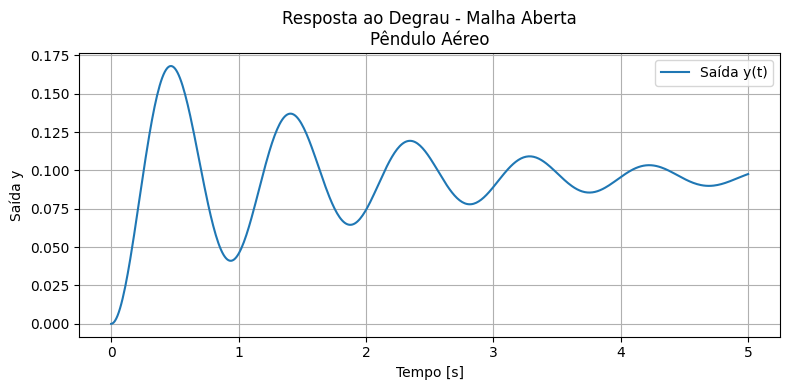

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parâmetros do sistema
num = [4.327]                 # Numerador
den = [1, 1.195, 45.19]      # Denominador

# Criação do sistema (função de transferência)
system = signal.TransferFunction(num, den)

# Tempo de simulação
t = np.linspace(0, 5, 500)   # 0 a 5 segundos, 500 pontos

# Resposta ao degrau unitário
t, y = signal.step(system, T=t)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, y, label='Saída y(t)')
plt.xlabel('Tempo [s]')
plt.ylabel('Saída y')
plt.title('Resposta ao Degrau - Malha Aberta\nPêndulo Aéreo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


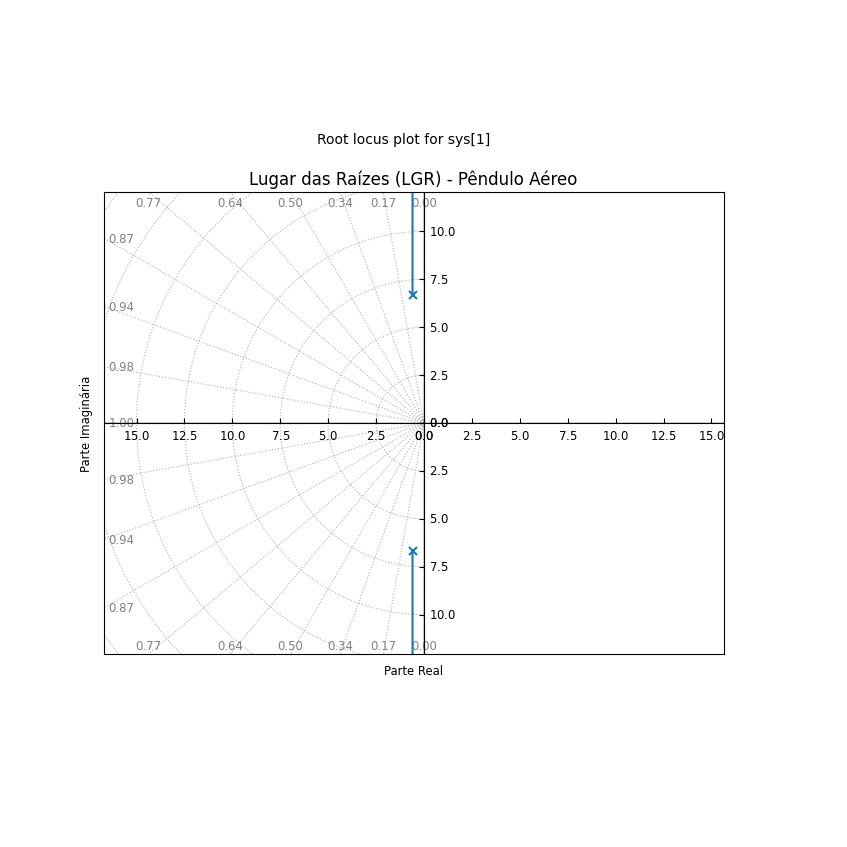

In [7]:
import matplotlib.pyplot as plt
import control

# Função de transferência do sistema
num = [4.326]
den = [1, 1.195, 45.207]
system = control.TransferFunction(num, den)

# Plot do Lugar das Raízes (LGR)
plt.figure(figsize=(8, 6))
control.root_locus(system, plot=True, grid=True)
plt.title('Lugar das Raízes (LGR) - Pêndulo Aéreo')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.show()

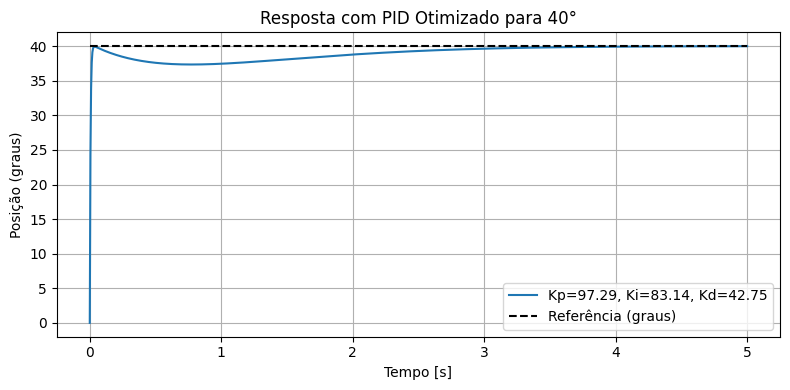

Ganhos PID ótimos: Kp=97.29, Ki=83.14, Kd=42.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Modelo do sistema
num = [4.326]
den = [1, 1.195, 45.207]
system = control.TransferFunction(num, den)

# 1. Obtenção dos parâmetros pelo método de Ziegler-Nichols (via resposta ao degrau)
# Aproximação do método: encontra Kcr (ganho crítico) e Pcr (período crítico)
# Usamos control.margin para estimar o ganho crítico de instabilidade

gm, pm, sm, wg, wp, ws = control.stability_margins(system, returnall=True)
Kcr = gm  # ganho de margem de ganho
Pcr = 2*np.pi/wp if wp != 0 else 1  # período de oscilação crítica

# Parâmetros PID pelo método de Ziegler-Nichols (clássico)
Kp = 0.6 * Kcr
Ti = 0.5 * Pcr
Td = 0.125 * Pcr

Ki = Kp / Ti
Kd = Kp * Td

# 2. Monta o controlador PID
pid = control.TransferFunction([Kd, Kp, Ki], [1, 0])

# 3. Sistema em Malha Fechada (feedback)
system_closed = control.feedback(pid*system, 1)

# 4. Simulação da resposta ao degrau para setpoint de 40 graus
t = np.linspace(0, 5, 500)
t, y = control.step_response(system_closed * 40, T=t)

# 5. Plot
plt.figure(figsize=(8,4))
plt.plot(t, y, label='Saída y(t)')
plt.axhline(40, color='r', linestyle='--', label='Setpoint (40)')
plt.xlabel('Tempo [s]')
plt.ylabel('Saída y (graus)')
plt.title('Controle PID - Sintonia Automática (Ziegler-Nichols)\nSetpoint 40 graus')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 6. Mostra os ganhos encontrados
print(f'Ganhos PID automáticos (Ziegler-Nichols):')
print(f'Kp = {Kp:.4f}')
print(f'Ki = {Ki:.4f}')
print(f'Kd = {Kd:.4f}')

## Tentativa 2

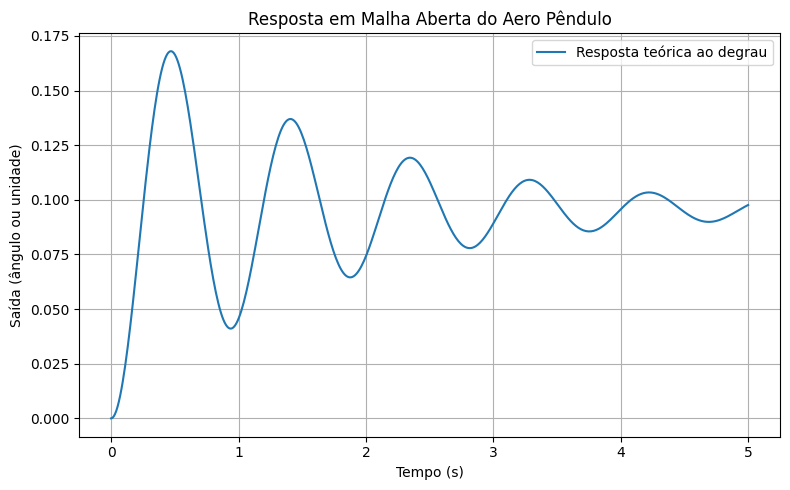

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. Definindo a função de transferência G(s) = 4.326 / (s^2 + 1.195 s + 45.207)
num = [4.326]
den = [1, 1.195, 45.207]
system = signal.TransferFunction(num, den)

# 2. Simulando a resposta ao degrau (malha aberta)
t = np.linspace(0, 5, 500)            # eixo de tempo de 0 a 5 segundos
t, y = signal.step(system, T=t)      # y: saída simulada

# 3. Dados medidos (exemplo; substitua pelos seus)
#t_meas = np.linspace(0, 5, 100)      # seus instantes de amostragem
#x_meas = np.ones_like(t_meas) * 1.0  # exemplo de degrau unitário na entrada
#y_meas = 0.1 * (1 - np.exp(-0.5 * t_meas))  # exemplo hipotético de saída

# 4. Plotando simulação e medições
plt.figure(figsize=(8, 5))
plt.plot(t, y, label='Resposta teórica ao degrau')
#plt.scatter(t_meas, y_meas, color='red', s=20, label='Dados medidos')
plt.title('Resposta em Malha Aberta do Aero Pêndulo')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída (ângulo ou unidade)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


Parâmetros PID: Kp = 0.0600, Ki = 0.1285, Kd = 0.0070


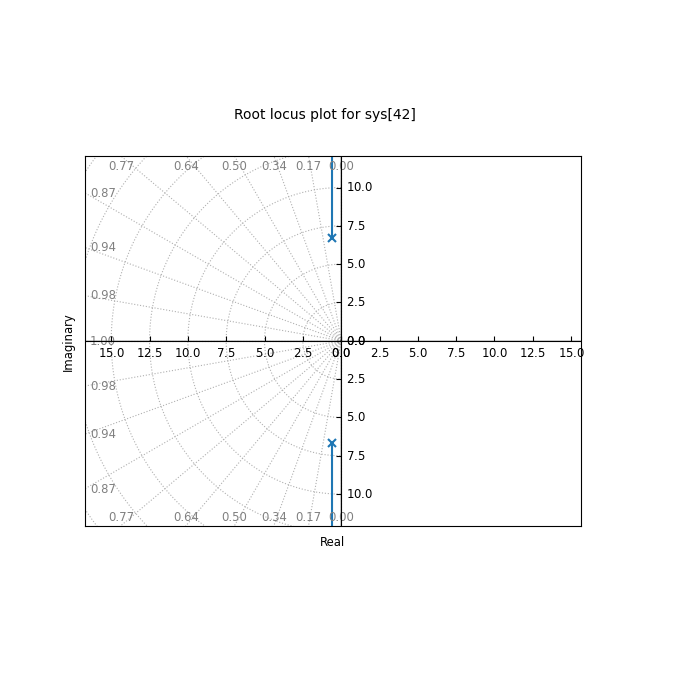

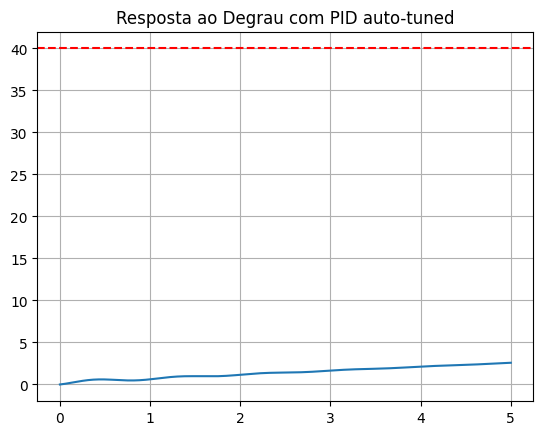

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import TransferFunction, root_locus, feedback, step_response
import control          # <— adicione

# Parâmetros físicos
m = 0.135; L = 0.217; g = 9.81; c = 0.0076; gamma = 0.0275
J = m * L**2

# Função de transferência G(s)
num = [gamma / J]; den = [1, c/J, g/L]
G = TransferFunction(num, den)

# 1) Root Locus
plt.figure()
root_locus(G, plot=True)
plt.grid(True)

# 2) Sintonia automática Ziegler–Nichols
# obtém margem de ganho e frequência crítica
gm, pm, sm, wg, wp, ws = control.stability_margins(G, returnall=True)
Kcr = gm
Pcr = 2*np.pi/wp if wp>0 else 1
# parâmetros Z–N clássicos
Kp = 0.6 * Kcr
Ti = 0.5 * Pcr
Td = 0.125 * Pcr
Ki = Kp/Ti
Kd = Kp*Td
# print(f'Kp = {Kp:.4f}, Ki = {Ki:.4f}, Kd = {Kd:.4f}')
# monta C(s)
C = TransferFunction([Kd, Kp, Ki], [1, 0])

# 3) malha fechada e 4) resposta ao degrau
T_cl = feedback(C*G, 1)
t = np.linspace(0,5,500)
t, y = step_response(T_cl*40, T=t)
plt.figure()
plt.plot(t,y); plt.axhline(40,ls='--',c='r')
plt.title('Resposta ao Degrau com PID auto-tuned')
plt.grid(True)
plt.show()

Oscilação sustentada em Kp ≈ 0.10, Pu ≈ 0.93s


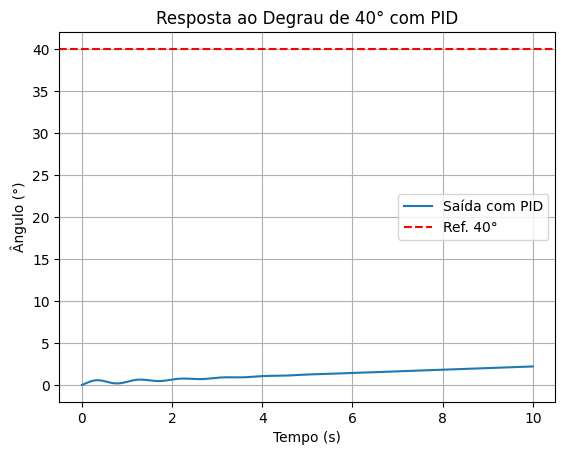

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import TransferFunction, feedback, step_response
from scipy.signal import find_peaks

# --- Definições físicas ---
m, L, g = 0.135, 0.217, 9.81
c, gamma = 0.0076, 0.0275
J = m * L**2
G = TransferFunction([gamma/J], [1, c/J, g/L])

# --- 1) Encontrar Ku e Pu via P-only closed-loop ---
def simulate_p(Kp, t):
    T_cl = feedback(Kp * G, 1)
    _, y = step_response(T_cl, T=t)
    return y

t = np.linspace(0, 20, 5000)
Kp_vals = np.linspace(0.1, 100, 200)  # varredura inicial de Kp
Ku, Pu = None, None

for Kp in Kp_vals:
    y = simulate_p(Kp, t)
    # buscamos picos regulares indicando oscilação sustentada
    peaks, _ = find_peaks(y[int(0.5*len(y)):], height=0)  
    if len(peaks) >= 5:
        # períodos entre picos
        times = t[int(0.5*len(t)) + peaks]
        periods = np.diff(times)
        Pu = np.mean(periods)
        Ku = Kp
        print(f"Oscilação sustentada em Kp ≈ {Ku:.2f}, Pu ≈ {Pu:.2f}s")
        break

from control import TransferFunction, feedback, step_response

# --- ganhos calculados (exemplo: via Ziegler–Nichols) ---
Kp_z, Ki_z, Kd_z = 0.6 * Ku, 0.5 * Ku / Pu, 0.125 * Ku * Pu

# Controlador PID manual
# Numerador: [Kd, Kp, Ki]
# Denominador: [1, 0]  (é o 's' do integrador)
C = TransferFunction([Kd_z, Kp_z, Ki_z], [1, 0])

# Seu G(s) (já definido)
G = TransferFunction([gamma/J], [1, c/J, g/L])

# Malha fechada
T_cl = feedback(C * G, 1)

# Resposta ao degrau de 40°
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 500)
t, y = step_response(T_cl * 40, T=t)

plt.figure()
plt.plot(t, y, label='Saída com PID')
plt.axhline(40, color='r', linestyle='--', label='Ref. 40°')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (°)')
plt.title('Resposta ao Degrau de 40° com PID')
plt.grid(True)
plt.legend()
plt.show()
